# Sentiment Analysis on News Articles

Based on [Sentiment Analysis on News Articles for Cryptocurrencies With Python](https://www.youtube.com/watch?v=BLAvU3LV1AM) from [Computer Science](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

## Description
This program analyses the sentiment about crypto using news headlines and Python

Import the libraries

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

Load the data

In [3]:
df = pd.read_csv("CryptoCurrencyNews.csv", index_col=0) # Remove first unnamed column

Show the data

In [4]:
df

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,Lucinda Southern,Why More Media Companies Are Looking for C-Sui...,"In late March, 98-year-old Time magazine poste...",https://www.adweek.com/media/why-more-media-co...,https://www.adweek.com/wp-content/uploads/2021...,2021-05-10T00:00:00Z,"In late March, 98-year-old Time magazine poste...",NaN,Adweek
1,Agence France-presse,SpaceX to launch lunar mission paid with crypt...,SpaceX will launch a satellite to the Moon nex...,https://news.abs-cbn.com/business/05/10/21/spa...,https://sa.kapamilya.com/absnews/abscbnnews/me...,2021-05-09T23:50:05Z,TORONTO - SpaceX will launch a satellite to th...,NaN,Abs-cbn.com
2,Chuck Brooks,4 Beckoning Cyber-Threat Challenges - Forbes,Mitigating cyber-threats is a societal imperat...,https://www.forbes.com/sites/chuckbrooks/2021/...,https://thumbor.forbes.com/thumbor/fit-in/1200...,2021-05-09T23:43:23Z,"A close-up on an abstract design of a display,...",NaN,Forbes
3,Activist Post,Action Alert: Contact U.S. Legislators ASAP to...,By B.N. Frank American opposition to 5G is inc...,https://www.activistpost.com/2021/05/action-al...,https://www.activistpost.com/wp-content/upload...,2021-05-09T23:31:23Z,By B.N. Frank\r\nAmerican opposition to 5G is ...,NaN,Activistpost.com
4,Eric Ital,‘Saturday Night Live’ Ratings See Massive Spik...,While the quality of Elon Musk’s Saturday Nigh...,https://brobible.com/culture/article/saturday-...,https://brobible.com/wp-content/uploads/2021/0...,2021-05-09T23:27:53Z,NBC\r\nWhile the quality of Elon Musk’s Saturd...,NaN,BroBible
5,Chas Danner,"Dogecoin Survives Musk’s SNL Jokes, Will Fund ...",It’s been another whacky 48 hours for the inte...,http://nymag.com/intelligencer/2021/05/dogecoi...,https://pyxis.nymag.com/v1/imgs/c25/fa4/a06500...,2021-05-09T23:26:34Z,Its been another wacky 48 hours for the intern...,new-york-magazine,New York Magazine
6,Anders Melin,Dogecoin Goes on Wild Weekend Ride as Musk Cal...,Dogecoin Goes on Wild Weekend Ride as Musk Cal...,https://www.bloomberg.com/news/articles/2021-0...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,2021-05-09T23:22:38Z,Dogecoin investors had a wild ride this weeken...,bloomberg,Bloomberg
7,NaN,"As Scrutiny of Cryptocurrency Grows, the Indus...",Eric Lipton / New York Times:\nAs Scrutiny of ...,https://www.memeorandum.com/210509/p54,https://static01.nyt.com/images/2021/05/09/us/...,2021-05-09T23:20:00Z,memeorandum is an auto-generated summary of th...,NaN,Memeorandum.com
8,"Alyssa McDonald, Tracy Alloway",Five Things You Need to Know to Start Your Day,Unused Covid shots are piling up in Hong Kong ...,https://www.bloomberg.com/news/newsletters/202...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,2021-05-09T23:15:39Z,Unused Covid shots are piling up in Hong Kong ...,bloomberg,Bloomberg
9,Jacob Bliss,Report: DarkSide Hackers Committed ‘Double Ext...,Hackers stole data during the Colonial Pipelin...,https://www.breitbart.com/crime/2021/05/09/rep...,https://media.breitbart.com/media/2020/10/Gett...,2021-05-09T23:13:44Z,Hackers stole data during the Colonial Pipelin...,breitbart-news,Breitbart News


Set the date field as index

In [5]:
df = df.set_index(pd.DatetimeIndex(df['publishedAt'].values))

Show the data

In [6]:
df

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
2021-05-10 00:00:00+00:00,Lucinda Southern,Why More Media Companies Are Looking for C-Sui...,"In late March, 98-year-old Time magazine poste...",https://www.adweek.com/media/why-more-media-co...,https://www.adweek.com/wp-content/uploads/2021...,2021-05-10T00:00:00Z,"In late March, 98-year-old Time magazine poste...",NaN,Adweek
2021-05-09 23:50:05+00:00,Agence France-presse,SpaceX to launch lunar mission paid with crypt...,SpaceX will launch a satellite to the Moon nex...,https://news.abs-cbn.com/business/05/10/21/spa...,https://sa.kapamilya.com/absnews/abscbnnews/me...,2021-05-09T23:50:05Z,TORONTO - SpaceX will launch a satellite to th...,NaN,Abs-cbn.com
2021-05-09 23:43:23+00:00,Chuck Brooks,4 Beckoning Cyber-Threat Challenges - Forbes,Mitigating cyber-threats is a societal imperat...,https://www.forbes.com/sites/chuckbrooks/2021/...,https://thumbor.forbes.com/thumbor/fit-in/1200...,2021-05-09T23:43:23Z,"A close-up on an abstract design of a display,...",NaN,Forbes
2021-05-09 23:31:23+00:00,Activist Post,Action Alert: Contact U.S. Legislators ASAP to...,By B.N. Frank American opposition to 5G is inc...,https://www.activistpost.com/2021/05/action-al...,https://www.activistpost.com/wp-content/upload...,2021-05-09T23:31:23Z,By B.N. Frank\r\nAmerican opposition to 5G is ...,NaN,Activistpost.com
2021-05-09 23:27:53+00:00,Eric Ital,‘Saturday Night Live’ Ratings See Massive Spik...,While the quality of Elon Musk’s Saturday Nigh...,https://brobible.com/culture/article/saturday-...,https://brobible.com/wp-content/uploads/2021/0...,2021-05-09T23:27:53Z,NBC\r\nWhile the quality of Elon Musk’s Saturd...,NaN,BroBible
2021-05-09 23:26:34+00:00,Chas Danner,"Dogecoin Survives Musk’s SNL Jokes, Will Fund ...",It’s been another whacky 48 hours for the inte...,http://nymag.com/intelligencer/2021/05/dogecoi...,https://pyxis.nymag.com/v1/imgs/c25/fa4/a06500...,2021-05-09T23:26:34Z,Its been another wacky 48 hours for the intern...,new-york-magazine,New York Magazine
2021-05-09 23:22:38+00:00,Anders Melin,Dogecoin Goes on Wild Weekend Ride as Musk Cal...,Dogecoin Goes on Wild Weekend Ride as Musk Cal...,https://www.bloomberg.com/news/articles/2021-0...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,2021-05-09T23:22:38Z,Dogecoin investors had a wild ride this weeken...,bloomberg,Bloomberg
2021-05-09 23:20:00+00:00,NaN,"As Scrutiny of Cryptocurrency Grows, the Indus...",Eric Lipton / New York Times:\nAs Scrutiny of ...,https://www.memeorandum.com/210509/p54,https://static01.nyt.com/images/2021/05/09/us/...,2021-05-09T23:20:00Z,memeorandum is an auto-generated summary of th...,NaN,Memeorandum.com
2021-05-09 23:15:39+00:00,"Alyssa McDonald, Tracy Alloway",Five Things You Need to Know to Start Your Day,Unused Covid shots are piling up in Hong Kong ...,https://www.bloomberg.com/news/newsletters/202...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,2021-05-09T23:15:39Z,Unused Covid shots are piling up in Hong Kong ...,bloomberg,Bloomberg
2021-05-09 23:13:44+00:00,Jacob Bliss,Report: DarkSide Hackers Committed ‘Double Ext...,Hackers stole data during the Colonial Pipelin...,https://www.breitbart.com/crime/2021/05/09/rep...,https://media.breitbart.com/media/2020/10/Gett...,2021-05-09T23:13:44Z,Hackers stole data during the Colonial Pipelin...,breitbart-news,Breitbart News


Create a function to get the polarity

In [7]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

Create new column 'Polarity'

In [8]:
df['Polarity'] = df['title'].apply(getPolarity)

Show the data set with the new column

In [9]:
df.head(5)

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name,Polarity
2021-05-10 00:00:00+00:00,Lucinda Southern,Why More Media Companies Are Looking for C-Sui...,"In late March, 98-year-old Time magazine poste...",https://www.adweek.com/media/why-more-media-co...,https://www.adweek.com/wp-content/uploads/2021...,2021-05-10T00:00:00Z,"In late March, 98-year-old Time magazine poste...",NaN,Adweek,0.500000
2021-05-09 23:50:05+00:00,Agence France-presse,SpaceX to launch lunar mission paid with crypt...,SpaceX will launch a satellite to the Moon nex...,https://news.abs-cbn.com/business/05/10/21/spa...,https://sa.kapamilya.com/absnews/abscbnnews/me...,2021-05-09T23:50:05Z,TORONTO - SpaceX will launch a satellite to th...,NaN,Abs-cbn.com,0.000000
2021-05-09 23:43:23+00:00,Chuck Brooks,4 Beckoning Cyber-Threat Challenges - Forbes,Mitigating cyber-threats is a societal imperat...,https://www.forbes.com/sites/chuckbrooks/2021/...,https://thumbor.forbes.com/thumbor/fit-in/1200...,2021-05-09T23:43:23Z,"A close-up on an abstract design of a display,...",NaN,Forbes,0.000000
2021-05-09 23:31:23+00:00,Activist Post,Action Alert: Contact U.S. Legislators ASAP to...,By B.N. Frank American opposition to 5G is inc...,https://www.activistpost.com/2021/05/action-al...,https://www.activistpost.com/wp-content/upload...,2021-05-09T23:31:23Z,By B.N. Frank\r\nAmerican opposition to 5G is ...,NaN,Activistpost.com,0.100000
2021-05-09 23:27:53+00:00,Eric Ital,‘Saturday Night Live’ Ratings See Massive Spik...,While the quality of Elon Musk’s Saturday Nigh...,https://brobible.com/culture/article/saturday-...,https://brobible.com/wp-content/uploads/2021/0...,2021-05-09T23:27:53Z,NBC\r\nWhile the quality of Elon Musk’s Saturd...,NaN,BroBible,0.112121


Create a function to compute negative, neutral and positive sentiments

In [10]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

Create a new column to store the sentiment 

In [11]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)

Show the data set with the new column

In [12]:
df.head(5)

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name,Polarity,Sentiment
2021-05-10 00:00:00+00:00,Lucinda Southern,Why More Media Companies Are Looking for C-Sui...,"In late March, 98-year-old Time magazine poste...",https://www.adweek.com/media/why-more-media-co...,https://www.adweek.com/wp-content/uploads/2021...,2021-05-10T00:00:00Z,"In late March, 98-year-old Time magazine poste...",NaN,Adweek,0.500000,Positive
2021-05-09 23:50:05+00:00,Agence France-presse,SpaceX to launch lunar mission paid with crypt...,SpaceX will launch a satellite to the Moon nex...,https://news.abs-cbn.com/business/05/10/21/spa...,https://sa.kapamilya.com/absnews/abscbnnews/me...,2021-05-09T23:50:05Z,TORONTO - SpaceX will launch a satellite to th...,NaN,Abs-cbn.com,0.000000,Neutral
2021-05-09 23:43:23+00:00,Chuck Brooks,4 Beckoning Cyber-Threat Challenges - Forbes,Mitigating cyber-threats is a societal imperat...,https://www.forbes.com/sites/chuckbrooks/2021/...,https://thumbor.forbes.com/thumbor/fit-in/1200...,2021-05-09T23:43:23Z,"A close-up on an abstract design of a display,...",NaN,Forbes,0.000000,Neutral
2021-05-09 23:31:23+00:00,Activist Post,Action Alert: Contact U.S. Legislators ASAP to...,By B.N. Frank American opposition to 5G is inc...,https://www.activistpost.com/2021/05/action-al...,https://www.activistpost.com/wp-content/upload...,2021-05-09T23:31:23Z,By B.N. Frank\r\nAmerican opposition to 5G is ...,NaN,Activistpost.com,0.100000,Positive
2021-05-09 23:27:53+00:00,Eric Ital,‘Saturday Night Live’ Ratings See Massive Spik...,While the quality of Elon Musk’s Saturday Nigh...,https://brobible.com/culture/article/saturday-...,https://brobible.com/wp-content/uploads/2021/0...,2021-05-09T23:27:53Z,NBC\r\nWhile the quality of Elon Musk’s Saturd...,NaN,BroBible,0.112121,Positive


Plot and visualize the sentiment count

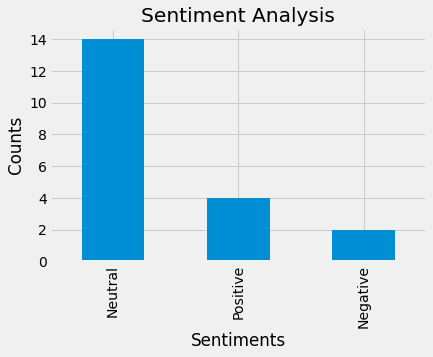

In [13]:
plt.title('Sentiment Analysis')
df['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

Plot the sum of the polarity for each date

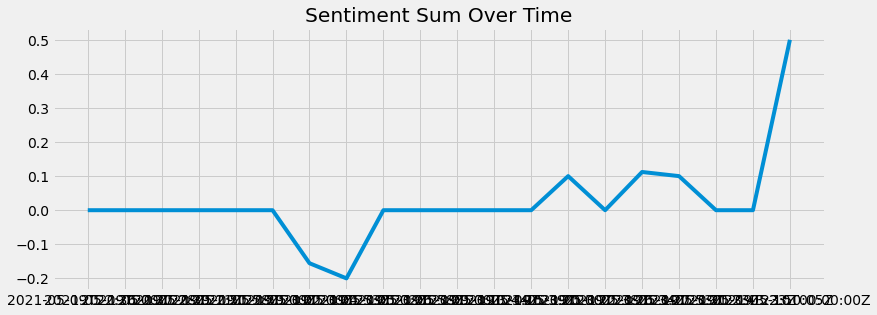

In [14]:
plt.figure(figsize=(12.33, 4.5))
plt.title('Sentiment Sum Over Time')
polarity = df.groupby(['publishedAt']).sum()['Polarity']
plt.plot(polarity.index, polarity)
plt.show()

Show sum of the polarity for each hour

In [15]:
polarity

publishedAt
2021-05-09T22:36:00Z    0.000000
2021-05-09T22:37:28Z    0.000000
2021-05-09T22:39:11Z    0.000000
2021-05-09T22:51:58Z    0.000000
2021-05-09T22:59:00Z    0.000000
2021-05-09T23:02:00Z    0.000000
2021-05-09T23:04:53Z   -0.155556
2021-05-09T23:05:02Z   -0.200000
2021-05-09T23:06:58Z    0.000000
2021-05-09T23:09:00Z    0.000000
2021-05-09T23:13:44Z    0.000000
2021-05-09T23:15:39Z    0.000000
2021-05-09T23:20:00Z    0.000000
2021-05-09T23:22:38Z    0.100000
2021-05-09T23:26:34Z    0.000000
2021-05-09T23:27:53Z    0.112121
2021-05-09T23:31:23Z    0.100000
2021-05-09T23:43:23Z    0.000000
2021-05-09T23:50:05Z    0.000000
2021-05-10T00:00:00Z    0.500000
Name: Polarity, dtype: float64

Get the count of each article per date

In [16]:
polarity_count = df.groupby(['publishedAt']).count()['Polarity']

Show the data

In [17]:
polarity_count

publishedAt
2021-05-09T22:36:00Z    1
2021-05-09T22:37:28Z    1
2021-05-09T22:39:11Z    1
2021-05-09T22:51:58Z    1
2021-05-09T22:59:00Z    1
2021-05-09T23:02:00Z    1
2021-05-09T23:04:53Z    1
2021-05-09T23:05:02Z    1
2021-05-09T23:06:58Z    1
2021-05-09T23:09:00Z    1
2021-05-09T23:13:44Z    1
2021-05-09T23:15:39Z    1
2021-05-09T23:20:00Z    1
2021-05-09T23:22:38Z    1
2021-05-09T23:26:34Z    1
2021-05-09T23:27:53Z    1
2021-05-09T23:31:23Z    1
2021-05-09T23:43:23Z    1
2021-05-09T23:50:05Z    1
2021-05-10T00:00:00Z    1
Name: Polarity, dtype: int64

Show the average sentiment for each hour

In [18]:
polarity / polarity_count

publishedAt
2021-05-09T22:36:00Z    0.000000
2021-05-09T22:37:28Z    0.000000
2021-05-09T22:39:11Z    0.000000
2021-05-09T22:51:58Z    0.000000
2021-05-09T22:59:00Z    0.000000
2021-05-09T23:02:00Z    0.000000
2021-05-09T23:04:53Z   -0.155556
2021-05-09T23:05:02Z   -0.200000
2021-05-09T23:06:58Z    0.000000
2021-05-09T23:09:00Z    0.000000
2021-05-09T23:13:44Z    0.000000
2021-05-09T23:15:39Z    0.000000
2021-05-09T23:20:00Z    0.000000
2021-05-09T23:22:38Z    0.100000
2021-05-09T23:26:34Z    0.000000
2021-05-09T23:27:53Z    0.112121
2021-05-09T23:31:23Z    0.100000
2021-05-09T23:43:23Z    0.000000
2021-05-09T23:50:05Z    0.000000
2021-05-10T00:00:00Z    0.500000
Name: Polarity, dtype: float64

Plot the average sentiment over time

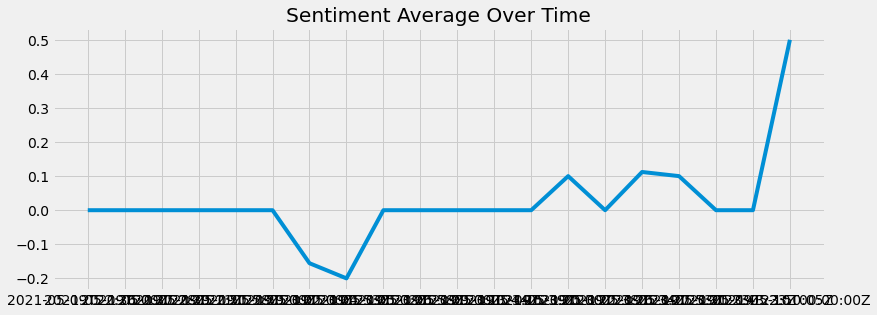

In [19]:
polarity_avg = polarity / polarity_count
plt.figure(figsize=(12.33,4.5))
plt.title('Sentiment Average Over Time')
plt.plot(polarity_avg.index, polarity_avg)
plt.show()

**THIS IS NOT AN INVESTMENT ADVICE!**